# NAM

This tutorial shows you how to download NAM data from Amazon (and other sources) with the Herbie Python package.

In [2]:
from herbie import Herbie
from herbie.toolbox import EasyMap, pc, ccrs
from herbie import paint

import matplotlib.pyplot as plt

In [3]:
H = Herbie("2022-12-10", model="nam", fxx=6)

✅ Found ┊ model=nam ┊ product=conusnest.hiresf ┊ 2022-Dec-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


In [4]:
H.PRODUCTS

{'conusnest.hiresf': 'CONUS 5 km',
 'firewxnest.hiresf': 'Fire Weather 1.33 km CONUS/1.5 km Alaska',
 'alaskanest.hiresf': 'Alaska 6 km',
 'hawaiinest.hiresf': 'Hawaii 6 km',
 'priconest.hiresf': 'Puerto Rico 3 km',
 'afwaca': 'Central America/Caribbean',
 'awphys': 'NAM 218 AWIPS Grid - CONUS; 12-km Resolution; full complement of pressure level fields and some surface-based fields',
 'awip12': 'NAM 218 AWIPS Grid - CONUS; 12-km Resolution; 12-km Resolution; full complement of surface-based fields',
 'goes218': 'NAM 218 AWIPS Grid - CONUS; 12-km Resolution; GOES Simulated Brightness Temp',
 'bgrdsf': 'NAM 190 grid - CONUS; 12-km Resolution; Staggered B-grid on rotated latitude/longitude grid',
 'bgrd3d': 'NAM 190 grid - CONUS; 12-km Resolution; Staggered B-grid on rotated lat/lon grid using the 60 NAM hybrid levels',
 'awip32': 'NAM 221 AWIPS Grid; 32-km Resolution; High Resolution North American Master Grid'}

## Hi-Res NAM CONUS

In [5]:
ds = H.xarray("TMP:2 m above")
ds

<xarray.Dataset> Size: 38MB
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 8B 2022-12-10
    step                 timedelta64[ns] 8B 06:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (y, x) float64 15MB 21.14 21.14 21.15 ... 47.85 47.84
    longitude            (y, x) float64 15MB 237.3 237.3 237.3 ... 299.0 299.1
    valid_time           datetime64[ns] 8B 2022-12-10T06:00:00
    gribfile_projection  object 8B None
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 8MB 292.3 291.9 292.2 ... 275.6 275.8
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   nam
    product:                 conusnest.hiresf
    description:             North America Mesoscale - CONUS
    remote_grib:             https://noaa-nam-pds.s3.amazonaws.com/nam.202212...
    local_grib:              /home/meteo/kps5442/data/nam/20221210/subset_22b...
    search:                  TMP:2 m above

Text(1.0, 1.0, '2 metre temperature')

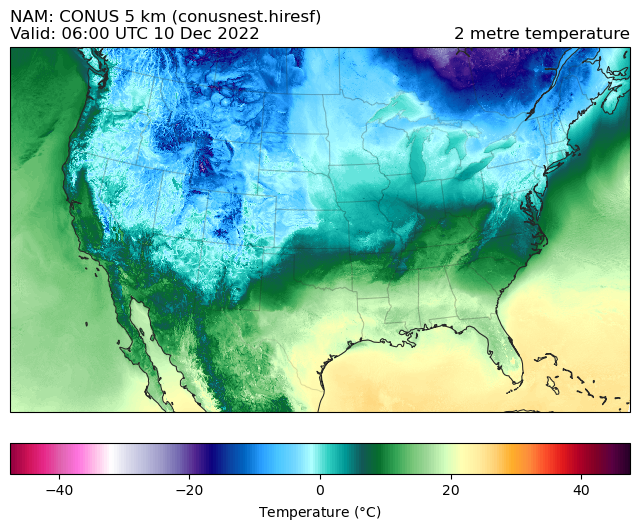

In [6]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[8, 8]).STATES().ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m - 273.15,
    transform=pc,
    **paint.NWSTemperature.kwargs,
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **paint.NWSTemperature.cbar_kwargs
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description} ({H.product})\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.t2m.GRIB_name, loc="right")

## 12km NAM
Added July 2024

In [7]:
# The 12km NAM
H = Herbie("2024-07-22-00", model="nam", product="awphys", fxx=6)

✅ Found ┊ model=nam ┊ product=awphys ┊ 2024-Jul-22 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


In [8]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
0,1.0,0,246500.0,0-246500,2024-07-22,2024-07-22 06:00:00,PRMSL,mean sea level,6 hour fcst,:PRMSL:mean sea level:6 hour fcst
1,2.0,246501,385516.0,246501-385516,2024-07-22,2024-07-22 06:00:00,REFD,1 hybrid level,6 hour fcst,:REFD:1 hybrid level:6 hour fcst
2,3.0,385517,577236.0,385517-577236,2024-07-22,2024-07-22 06:00:00,REFC,entire atmosphere (considered as a single layer),6 hour fcst,:REFC:entire atmosphere (considered as a singl...
3,4.0,577237,687332.0,577237-687332,2024-07-22,2024-07-22 06:00:00,VIS,surface,6 hour fcst,:VIS:surface:6 hour fcst
4,5.0,687333,878205.0,687333-878205,2024-07-22,2024-07-22 06:00:00,VIS,cloud top,6 hour fcst,:VIS:cloud top:6 hour fcst
...,...,...,...,...,...,...,...,...,...,...
449,400.0,62089262,62379571.0,62089262-62379571,2024-07-22,2024-07-22 06:00:00,DLWRF,surface,6 hour fcst,:DLWRF:surface:6 hour fcst
450,401.0,62379572,62380615.0,62379572-62380615,2024-07-22,2024-07-22 06:00:00,USWRF,surface,6 hour fcst,:USWRF:surface:6 hour fcst
451,402.0,62380616,62597205.0,62380616-62597205,2024-07-22,2024-07-22 06:00:00,ULWRF,surface,6 hour fcst,:ULWRF:surface:6 hour fcst
452,403.0,62597206,62671780.0,62597206-62671780,2024-07-22,2024-07-22 06:00:00,APCP,surface,3-6 hour acc fcst,:APCP:surface:3-6 hour acc fcst


In [9]:
H.xarray("REFC")

<xarray.Dataset> Size: 5MB
Dimensions:                (y: 428, x: 614)
Coordinates:
    time                   datetime64[ns] 8B 2024-07-22
    step                   timedelta64[ns] 8B 06:00:00
    atmosphereSingleLayer  float64 8B 0.0
    latitude               (y, x) float64 2MB 12.19 12.22 12.25 ... 57.36 57.33
    longitude              (y, x) float64 2MB 226.5 226.6 226.8 ... 310.4 310.6
    valid_time             datetime64[ns] 8B 2024-07-22T06:00:00
    gribfile_projection    object 8B None
Dimensions without coordinates: y, x
Data variables:
    refc                   (y, x) float32 1MB -1.03 -20.0 -20.0 ... 3.89 6.17
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   nam
    product:                 awphys
    description:             North America Mesoscale - CONUS
    remote_grib:             https://noaa-nam-pds.s3.amazonaws.com/nam.202407...
    local_grib:              /home/meteo/kps5442/data/nam/20240722/subset_1eb...
    search:                  REFC

## Additional products

In [10]:
def plot_product(product):
    H = Herbie("2022-12-10", model="nam", fxx=6, product=product)

    ds = H.xarray("TMP:2 m above")

    ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[8, 8]).STATES().ax
    p = ax.pcolormesh(
        ds.longitude,
        ds.latitude,
        ds.t2m - 273.15,
        transform=pc,
        **paint.NWSTemperature.kwargs2,
    )
    plt.colorbar(
        p,
        ax=ax,
        orientation="horizontal",
        pad=0.05,
        **paint.NWSTemperature.cbar_kwargs2,
    )

    ax.set_title(
        f"{ds.model.upper()}: {H.product_description} ({product})\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
        loc="left",
    )
    ax.set_title(ds.t2m.GRIB_name, loc="right")
    return H, ds, ax

In [11]:
H.PRODUCTS.keys()

dict_keys(['conusnest.hiresf', 'firewxnest.hiresf', 'alaskanest.hiresf', 'hawaiinest.hiresf', 'priconest.hiresf', 'afwaca', 'awphys', 'awip12', 'goes218', 'bgrdsf', 'bgrd3d', 'awip32'])

✅ Found ┊ model=nam ┊ product=conusnest.hiresf ┊ 2022-Dec-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


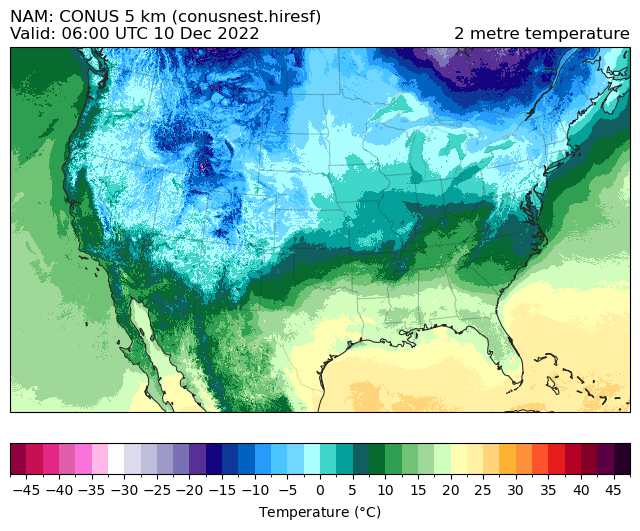

In [12]:
H, ds, ax = plot_product("conusnest.hiresf")

✅ Found ┊ model=nam ┊ product=firewxnest.hiresf ┊ 2022-Dec-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


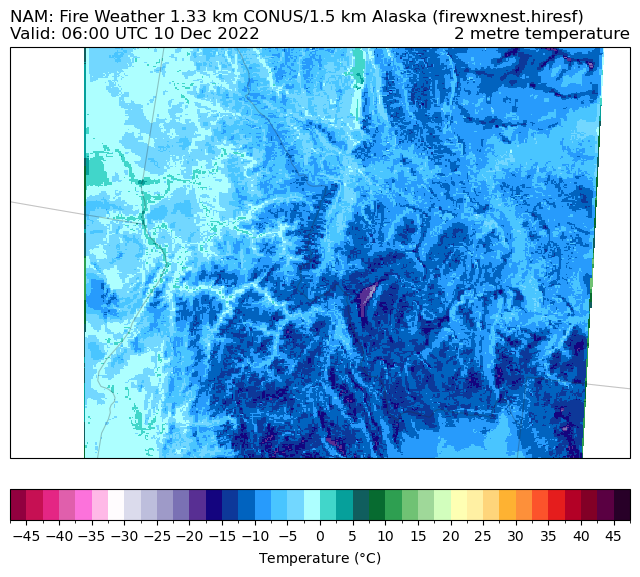

In [13]:
H, ds, ax = plot_product("firewxnest.hiresf")

✅ Found ┊ model=nam ┊ product=alaskanest.hiresf ┊ 2022-Dec-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


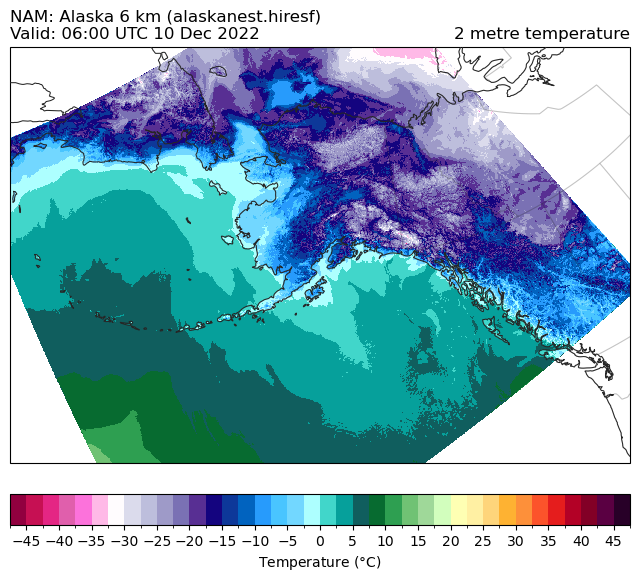

In [14]:
H, ds, ax = plot_product("alaskanest.hiresf")

✅ Found ┊ model=nam ┊ product=hawaiinest.hiresf ┊ 2022-Dec-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


ValueError: not enough values to unpack (expected 2, got 1)

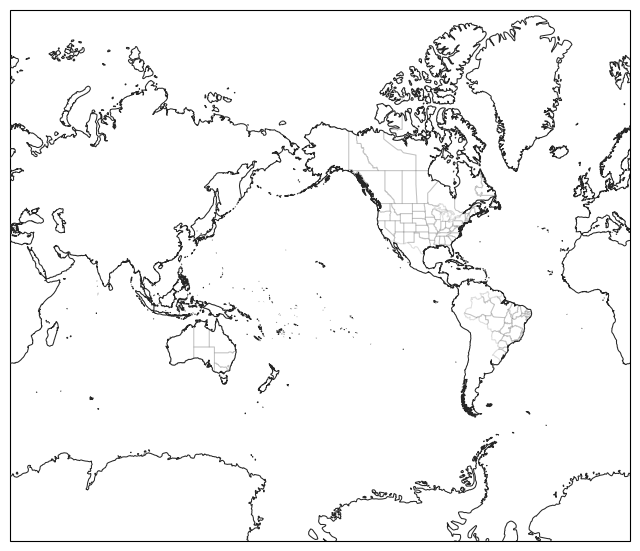

In [15]:
# NOTE: Weirdness with Hawaii not returning as a grid, but as a line
# NOTE: NEEDS TO BE RESHAPED

H, ds, ax = plot_product("hawaiinest.hiresf")

In [16]:
ds = Herbie("2022-08-10", model="nam", product="hawaiinest.hiresf").xarray("TMP:2 m")
ds

✅ Found ┊ model=nam ┊ product=hawaiinest.hiresf ┊ 2022-Aug-10 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


<xarray.Dataset> Size: 1MB
Dimensions:              (values: 72225)
Coordinates:
    time                 datetime64[ns] 8B 2022-08-10
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (values) float64 578kB 18.07 18.07 ... 23.09 23.09
    longitude            (values) float64 578kB 198.5 198.5 ... 206.1 206.1
    valid_time           datetime64[ns] 8B 2022-08-10
    gribfile_projection  object 8B None
Dimensions without coordinates: values
Data variables:
    t2m                  (values) float32 289kB 299.8 299.8 ... 299.0 299.0
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   nam
    product:                 hawaiinest.hiresf
    description:             North America Mesoscale - CONUS
    remote_grib:             https://noaa-nam-pds.s3.amazonaws.com/nam.202208...
    local_grib:              /home/meteo/kps5442/data/nam/20220810/subset_6fe...
    search:                  TMP:2 m

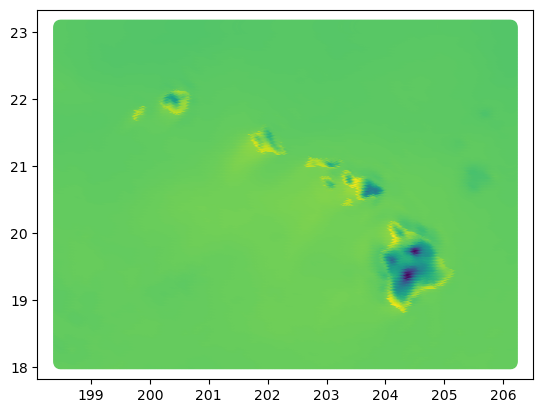

In [17]:
plt.scatter(ds.longitude, ds.latitude, ds.t2m, c=ds.t2m, marker=".")

✅ Found ┊ model=nam ┊ product=priconest.hiresf ┊ 2022-Dec-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


ValueError: not enough values to unpack (expected 2, got 1)

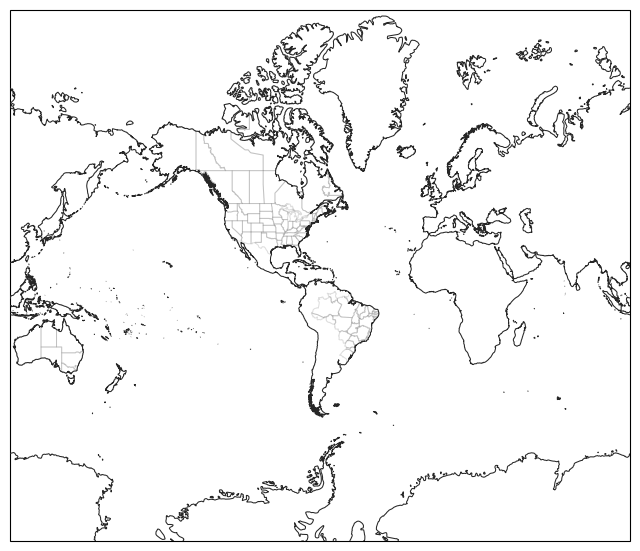

In [18]:
# NOTE: Weirdness with Puerto Rico not returning as a grid, but as a line

H, ds, ax = plot_product("priconest.hiresf")

In [19]:
ds = Herbie("2022-08-10", model="nam", product="priconest.hiresf").xarray(
    "TMP:2 m above"
)
ds

✅ Found ┊ model=nam ┊ product=priconest.hiresf ┊ 2022-Aug-10 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


<xarray.Dataset> Size: 3MB
Dimensions:              (values: 168640)
Coordinates:
    time                 datetime64[ns] 8B 2022-08-10
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
    latitude             (values) float64 1MB 15.0 15.0 15.0 ... 22.01 22.01
    longitude            (values) float64 1MB 284.5 284.5 284.5 ... 297.5 297.5
    valid_time           datetime64[ns] 8B 2022-08-10
    gribfile_projection  object 8B None
Dimensions without coordinates: values
Data variables:
    t2m                  (values) float32 675kB nan nan nan nan ... nan nan nan
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   nam
    product:                 priconest.hiresf
    description:             North America Mesoscale - CONUS
    remote_grib:             https://noaa-nam-pds.s3.amazonaws.com/nam.202208...
    local_grib:              /home/meteo/kps5442/data/nam/20220810/subset_6fe...
    search:                  TMP:2 m above

✅ Found ┊ model=nam ┊ product=afwaca ┊ 2022-Dec-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


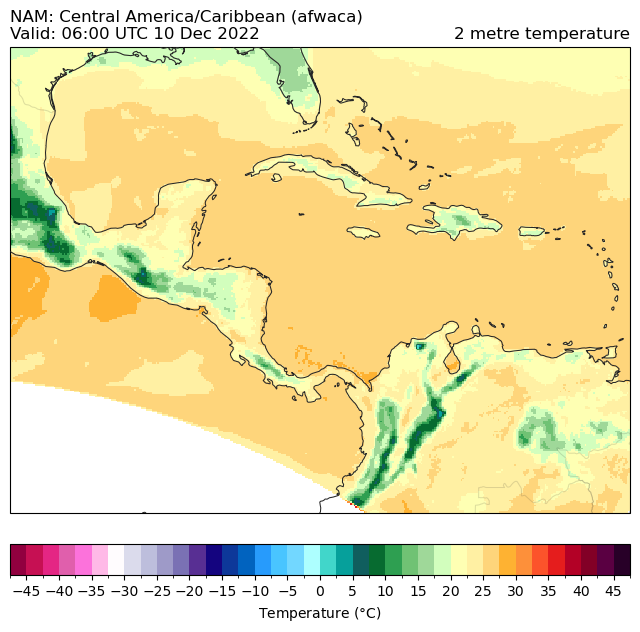

In [20]:
H, ds, ax = plot_product("afwaca")

✅ Found ┊ model=nam ┊ product=awphys ┊ 2022-Dec-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


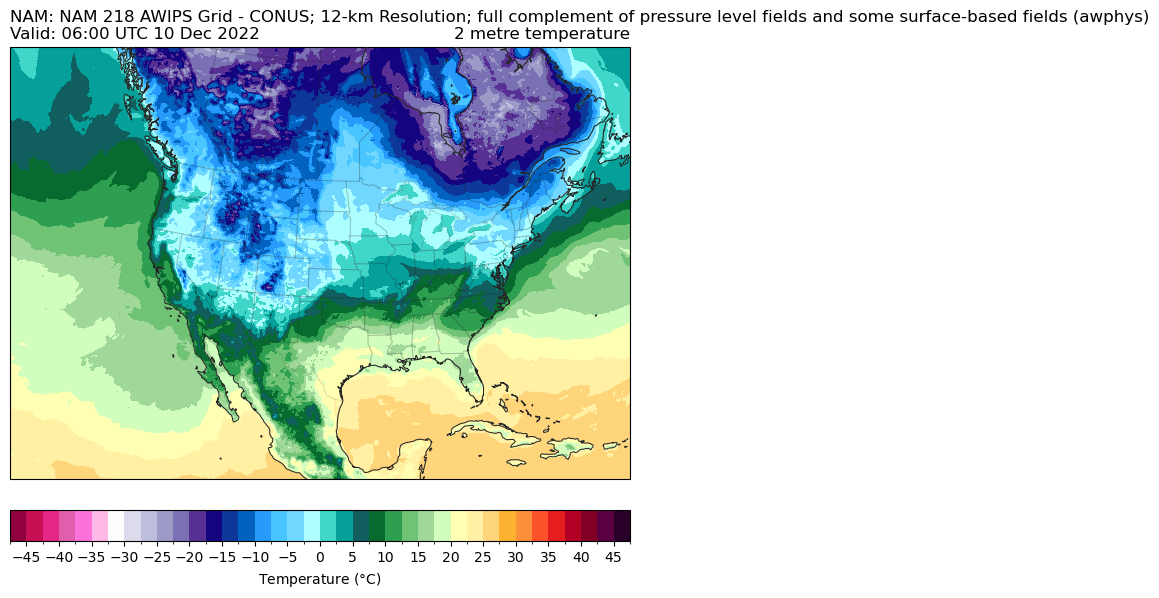

In [21]:
H, ds, ax = plot_product("awphys")

✅ Found ┊ model=nam ┊ product=awip32 ┊ 2022-Dec-10 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


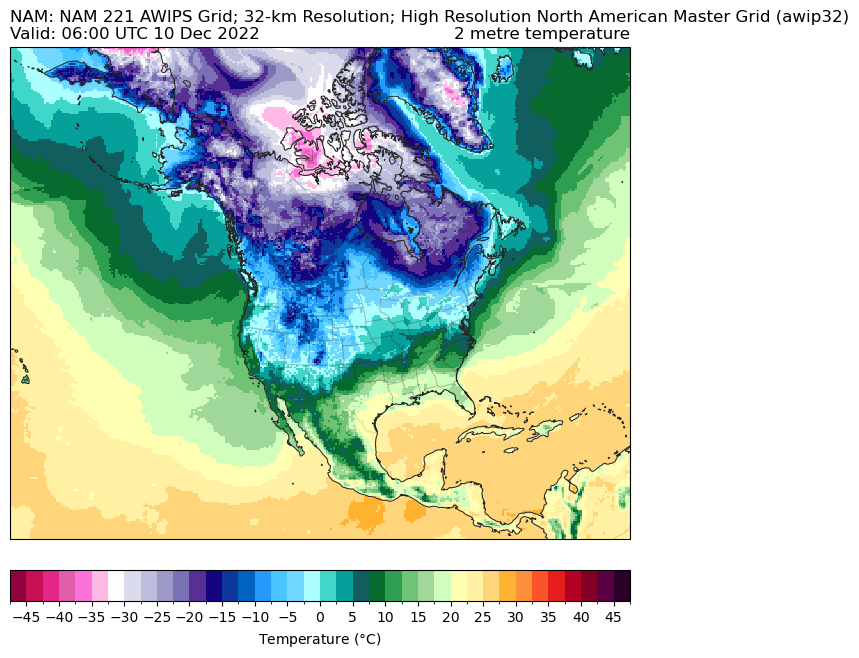

In [22]:
H, ds, ax = plot_product("awip32")